# A Brief Into to AI

This series of notebooks is intended to give you a quick taste of how you can build on your knowledge of Python to start exploring the field of AI.

Python is the *de facto* language of AI. While other languages can be used, currently, the vast majority of AI development is in Python. This is one reason that Python just became the [most used programming language on GitHub](https://github.blog/news-insights/octoverse/octoverse-2024/)! So, you have a great start there!

Artificial Intelligence is a huge field, with a long history and many applications. We can't possibly cover everything here! 

> Interested in more on AI, especially as it is used in analyzing biological data?? Enroll in [AI in Biology](https://aibiology.github.io/)!! Arthur Porto and I typically teach this every Spring semester.

## History of AI in one image

![Brief history of AI from NVIDIA Blog](https://blogs.nvidia.com/wp-content/uploads/2016/07/Deep_Learning_Icons_R5_PNG.jpg-672x427.png)

Key points:
* AI is not new, the term was coined in the 1955!
* Lots of developments, but many setbacks over the years
* GPUs (Graphical Processing Units) changed things in 2012 with AlexNet
* Availability of large-scale data, and advances in computing power have fueled the current AI boom
* AI's history has many "winters" where large investments and over-sold hype fail to produce results and people look elsewhere...be careful!



## Machine Learning

One category of AI is Machine Learning. These methods were early attempts to tap into computer's abilities to find patterns in data. There are two main categories of machine learning:

* **Supervised Learning**: A type of machine learning where the model is trained on labeled data, meaning the input data is paired with the correct output. The goal is to learn a mapping from inputs to outputs to make predictions on new, unseen data.

* **Unsupervised Learning:** A type of machine learning where the model is trained on unlabeled data, meaning the input data has no corresponding output labels. The goal is to find hidden patterns or intrinsic structures within the input data.


## An example

Let's start our exploration with an example of supervised machine learning. 

We'll start with a relatively simple linear regression problem.

### 1. Let's make some data:

In [122]:
import pandas as pd
import numpy as np

# Generate some data using the formula y = 2x + 1 + error

# Set the seed for reproducibility
np.random.seed(0)

# Generate 100 random x values between 0 and 1
x = np.random.rand(100, 1)

# Generate random error values from a normal distribution with mean 0 and standard deviation 0.1
error = np.random.normal(0, 0.2, (100, 1))

# Calculate y
y = 2 * x + 1 + error

# Create a DataFrame to store our X and y values
data = pd.DataFrame(data=np.hstack([x, y]), columns=['x', 'y'])

# Print the first 5 rows of the data
print(data.head())

          x         y
0  0.548814  1.864597
1  0.715189  2.610544
2  0.602763  2.298659
3  0.544883  1.782518
4  0.423655  2.144960


### 2. Plot the data

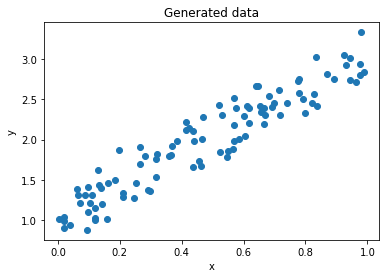

In [123]:
# Plot the data
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated data')
plt.show()

### 3. Splits the data

One thing we want to do first is split our data into at least 2 sets. The **training set** will be used to train the model. But we also want a **validation set** that can be used to evaluate how well the model does on unseen data.

We also often want a third partition, the **testing set** that is used after all model fitting is done and we are ready to evaluate our final model.

Partially because of the name of the function we will use (`train_test_split`) and partially because people often don't distinguish between validation and testing sets, you will frequently see the name test where validation is meant.

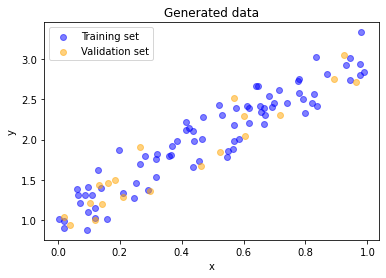

In [125]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data['x'], data['y'], test_size=0.2, random_state=0)

# Plot the training and test sets
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.scatter(X_val, y_val, color='orange', label='Validation set', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generated data')
plt.show()


### 4. Make a model

You may be familiar with linear regression and the equation for a line:

$$ y = mx + b $$

where $m$ is the slope and $b$ is the intercept of the line.

*We* know, because we made the data above, that the slope should be 2 and the intercept 1, but in reality we don't know this...so...

Let's guess that the slope is 0.5 and the intercept is 2.

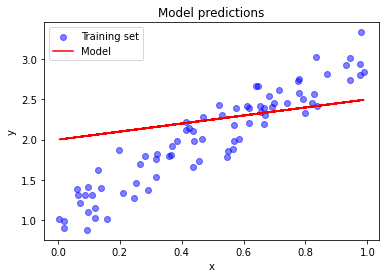

In [126]:
# Guess at slope and intercept
slope = 0.5
intercept = 2

# Make predictions
y_pred = slope * X_train + intercept

# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.plot(X_train, y_pred, color='red', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model predictions')
plt.show()

In [127]:
def report_values(X_train, X_val, y_train, y_val, slope, intercept):
    print('Slope:', slope)
    print('Intercept:', intercept)

    # Make training predictions
    y_pred = slope * X_train + intercept
    
    # Calculate the mean squared error
    mse = np.mean((y_pred - y_train) ** 2)
    print('Train mean squared error:', mse)

    # Make test predictions
    y_pred = slope * X_val + intercept

    # Calculate the mean squared error
    mse = np.mean((y_pred - y_val) ** 2)
    print('Validation mean squared error:', mse)

report_values(X_train, X_val, y_train, y_val, slope, intercept)

Slope: 0.5
Intercept: 2
Train mean squared error: 0.25620701380452926
Validation mean squared error: 0.4114591070452109


### 5. Train the model

Now we know how our model did. Not great...

How can we improve the model? 

We don't have time to get into the details, but the general idea is that we look at each parameter (we only have two parameters, the slope and intercept) and use differential equations to calculate the slope or gradient for that parameter. Essentially, use calculus to figure out if we need to increase or decrease the value of the parameter.

In our case, we only have two parameters to update, in a large language model, for example, there may be a trillion parameters (or more) to update!

Because this is called the backward pass, I've named the function `backward_step`. It takes in the data and current parameter values and returns the updated values.

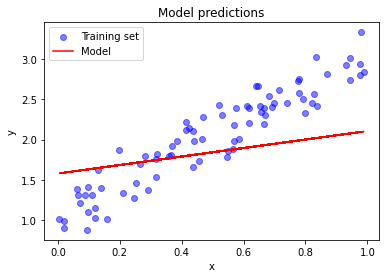

Slope: 0.5273097969000038
Intercept: 1.5796548892131637
Train mean squared error: 0.24440719414341833
Validation mean squared error: 0.22708816118950934


In [128]:
def backward_step(X_train, y_train, slope, intercept, learning_rate=0.1):
    # Make predictions
    y_pred = slope * X_train + intercept

    # Calculate the error
    error = y_train - y_pred

    # Calculate the slope and intercept gradients
    slope_gradient = -2 * np.mean(X_train * error)
    intercept_gradient = -2 * np.mean(error)

    # Update the slope and intercept
    slope = slope - (learning_rate * slope_gradient)
    intercept = intercept - (learning_rate * intercept_gradient)

    return slope, intercept

slope, intercept = backward_step(X_train, y_train, slope, intercept, 1)
y_pred = slope * X_train + intercept

# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.plot(X_train, y_pred, color='red', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model predictions')
plt.show()

report_values(X_train, X_val, y_train, y_val, slope, intercept)

Hopefully, the line looks closer to what we want, and our Traning and Validation error have decreased.

Let's do that some more... (you may want to run the next cell multiple times)

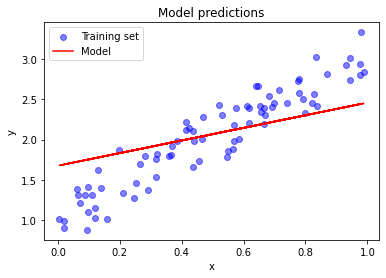

Slope: 0.7830194147232425
Intercept: 1.6765942203347093
Train mean squared error: 0.1528184074669727
Validation mean squared error: 0.2097121640224076


In [129]:
# Train the model for 20 epochs

for i in range(10):
    slope, intercept = backward_step(X_train, y_train, slope, intercept, 0.1)

y_pred = slope * X_train + intercept

# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.plot(X_train, y_pred, color='red', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model predictions')
plt.show()

report_values(X_train, X_val, y_train, y_val, slope, intercept)

## A general supervised learning cycle

Here's a general diagram of how supervised learning works. This is the case for just about any type of AI model.


![A generalized AI training cycle](https://raw.githubusercontent.com/AIBiology/Jupyter_Content/refs/heads/main/images/AI-cycle.png)

## Scikit-Learn to the rescue

![scikit-learn logo](https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg)

Luckily, we don't need to write all of this code... There are frameworks to take care of everything from the simplest linear regression to the most complex models.

[Scikit-learn](https://scikit-learn.org/stable/) is the main machine learning framework, and is a good place to start with machine learning. If your datasets get too large, you may want to check out [NVIDIA's RAPIDS framework](https://rapids.ai/), in particular cuML, which provides mostly drop-in replacements that run on the GPU (sklearn is CPU only).

Let's take a quick look at how we might train a linear regression model with sklearn.

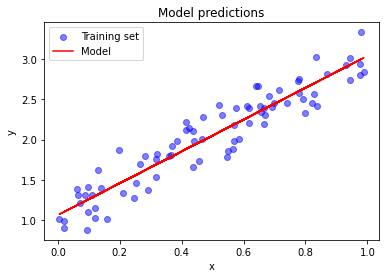

Train mean squared error: 0.03944928399813813
Validation mean squared error: 0.04173733526278072
Slope: 1.9745886031304982
Intercept: 1.0644717060842694


In [137]:
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
model = LinearRegression()

# Reshape the data
X_train = np.array(X_train).reshape(-1, 1)
X_val = np.array(X_val).reshape(-1, 1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate the mean squared error
mse_train = np.mean((y_pred_train - y_train) ** 2)
mse_val = np.mean((y_pred_val - y_val) ** 2)


# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.plot(X_train, y_pred_train, color='red', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model predictions')
plt.show()

print('Train mean squared error:', mse_train)
print('Validation mean squared error:', mse_val)
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)

The lines that actually do the model training are:

    # Create a LinearRegression object
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

Make a model and run `model.fit()`. That will get you a **long** way in AI...


## Let's look at some real data

These data from [Kaggle](https://www.kaggle.com/datasets/abrambeyer/openintro-possum).

**Original Source of dataset**:
> Lindenmayer, D. B., Viggers, K. L., Cunningham, R. B., and Donnelly, C. F. 1995. Morphological variation among columns of the mountain brushtail possum, Trichosurus caninus Ogilby (Phalangeridae: Marsupiala). Australian Journal of Zoology 43: 449-458.


Column | Details
-------|--------
case   | Observation number
site   | The site number where the possum was trapped.
Pop    | Population, either Vic (Victoria) or other (New South Wales or Queensland).
sex    | Gender, either m (male) or f (female).
age    | Age.
hdlngth | Head length, in mm.
skullw  | Skull width, in mm.
totlngth | Total length, in cm.
taill | Tail length, in cm.
footlgth | Foot length
earconch | Ear conch length
eye | Distance from medial canthus to lateral canthus of right eye
chest | Chest girth (in cm)
belly | Belly girth (in cm)

In [ ]:
# Load the data
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


array([[<AxesSubplot: xlabel='case', ylabel='case'>,
        <AxesSubplot: xlabel='site', ylabel='case'>,
        <AxesSubplot: xlabel='age', ylabel='case'>,
        <AxesSubplot: xlabel='hdlngth', ylabel='case'>,
        <AxesSubplot: xlabel='skullw', ylabel='case'>,
        <AxesSubplot: xlabel='totlngth', ylabel='case'>,
        <AxesSubplot: xlabel='taill', ylabel='case'>,
        <AxesSubplot: xlabel='footlgth', ylabel='case'>,
        <AxesSubplot: xlabel='earconch', ylabel='case'>,
        <AxesSubplot: xlabel='eye', ylabel='case'>,
        <AxesSubplot: xlabel='chest', ylabel='case'>,
        <AxesSubplot: xlabel='belly', ylabel='case'>],
       [<AxesSubplot: xlabel='case', ylabel='site'>,
        <AxesSubplot: xlabel='site', ylabel='site'>,
        <AxesSubplot: xlabel='age', ylabel='site'>,
        <AxesSubplot: xlabel='hdlngth', ylabel='site'>,
        <AxesSubplot: xlabel='skullw', ylabel='site'>,
        <AxesSubplot: xlabel='totlngth', ylabel='site'>,
        <AxesSubplo

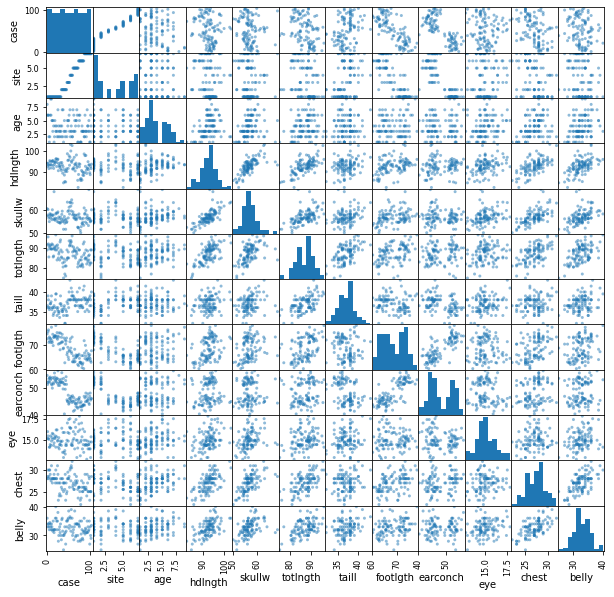

In [146]:
# Make a scattermatrix of the data
pd.plotting.scatter_matrix(df, figsize=(10, 10))

## Start with something easy

It looks like head length and skull width have a linear correlation. Let's see if we can fit a model to predict skull width given a head length.

In [147]:
X_train, X_val, y_train, y_val = train_test_split(df[['hdlngth']], df['skullw'], test_size=0.2)

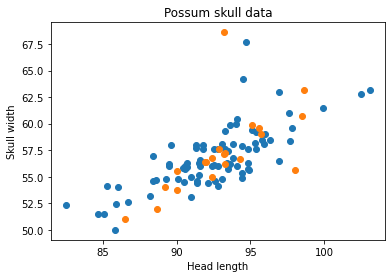

In [149]:
# Check the relationship by plotting the data
plt.scatter(X_train, y_train)
plt.scatter(X_val, y_val)
plt.xlabel('Head length')
plt.ylabel('Skull width')
plt.title('Possum skull data')
plt.show()


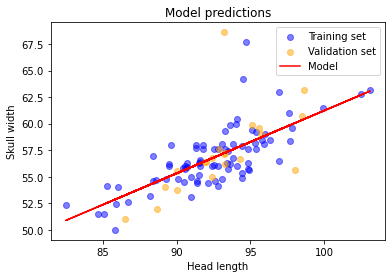

Train mean squared error: 3.778583354247735
Validation mean squared error: 8.639208121908059
R2: 0.38473935750066934


In [153]:
# Create a LinearRegression object
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get accuracy
mse_train = np.mean((model.predict(X_train) - y_train) ** 2)
mse_val = np.mean((model.predict(X_val) - y_val) ** 2)

# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training set', alpha=0.5)
plt.scatter(X_val, y_val, color='orange', label='Validation set', alpha=0.5)
plt.plot(X_train, model.predict(X_train), color='red', label='Model')
plt.xlabel('Head length')
plt.ylabel('Skull width')
plt.legend()
plt.title('Model predictions')
plt.show()

print('Train mean squared error:', mse_train)
print('Validation mean squared error:', mse_val)

# Print R2
r2 = model.score(X_val, y_val)
print('R2:', r2)